### Time Series Analysis: Electricity Consumption

It shows the consumption of electricity from 1985 till 2018. The goal is to predict electricity consumption.
Task performed by group members-
- 1- Saifali - Data Visualization
- 2- Tushar - PACF/ACF/MA
- 3- Amol - ARIMA Model
- 4- Tejaswini - Auto ARIMA and Prophet

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

In [2]:
df = pd.read_csv("Electric_Production.csv")

In [3]:
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


 It contains only 2 columns, one column is Date and the other column relates to the consumption percentage.

In [4]:
df.tail()

,DATE,IPG2211A2N
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212
396,1/1/2018,129.4048


It shows the consumption of electricity from 1985 till 2018.

In [5]:
df.shape

(397, 2)

In [6]:
df.nunique()

DATE          397
IPG2211A2N    397
dtype: int64

In [7]:
df.dtypes

DATE           object
IPG2211A2N    float64
dtype: object

In [8]:
df["DATE"] = pd.to_datetime(df["DATE"])

In [9]:
df.set_index('DATE', inplace=True) 

In [10]:
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [11]:
df = df.rename(columns = {"IPG2211A2N":"Consumption"})

In [12]:
df.head()

,Consumption
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


### Visualizing Time Series

Text(0.5, 1.0, 'production graph')

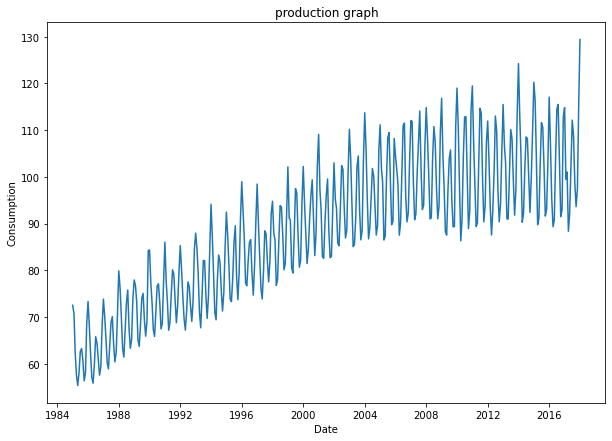

In [13]:
plt.plot(df)
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.title("production graph")

As we can see, the mean is not constant as there is an upward trend. Hence, we have identified that our series is not stationary. Let's verify it using Adfuller

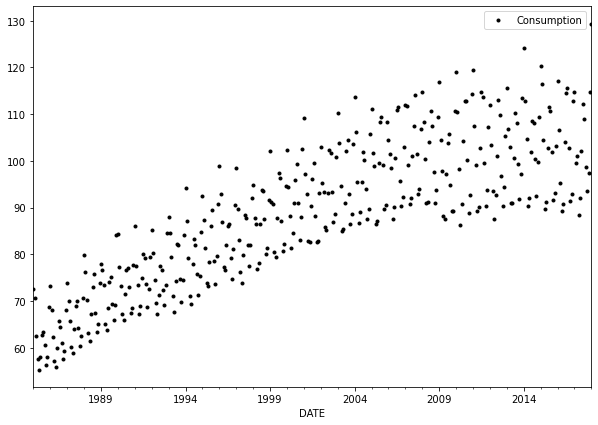

In [14]:
df.plot(style='k.')
plt.show()

<AxesSubplot:ylabel='Density'>

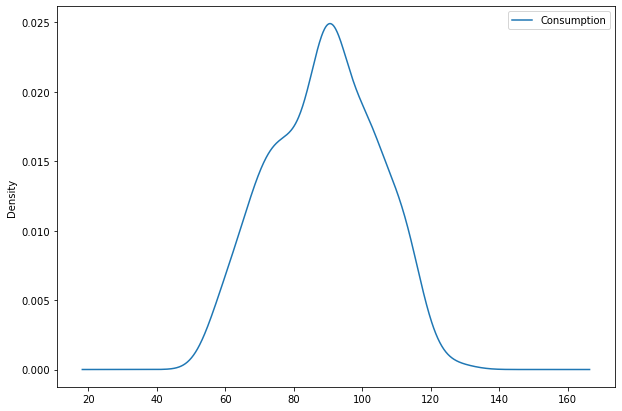

In [15]:
#Distribution of the dataset
df.plot(kind='kde')

We can observe a near-normal distribution(bell-curve) over consumption values.

In order to perform a time series analysis, we may need to separate seasonality and trend from our series. So let us separate Trend and Seasonality from the time series.

### Seasonal Decompose

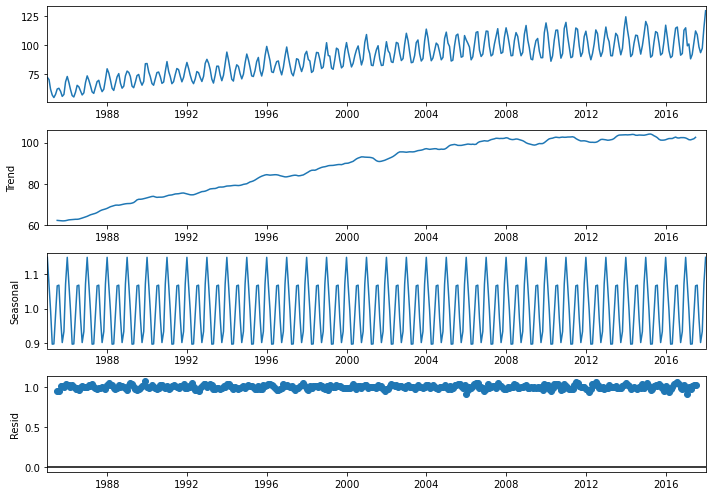

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative')
result.plot()
plt.show()

### ADF (Augmented Dickey-Fuller) Test

In [17]:
from statsmodels.tsa.stattools import adfuller
result = adfuller (df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
if (result[1] < 0.05):
    print('Data is stationary')
else:
    print('Data is not stationary')

ADF Statistic: -2.256990
p-value: 0.186215
Data is not stationary


We using a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then we find the rolling average of the series.

In [18]:
result = adfuller(df.Consumption.diff().dropna())
if result[1] < 0.05:
    print('It is Stationary')
else:
    print('It is not Stationary')
result[1]

It is Stationary


4.077786565538474e-10

### Moving Average

In [19]:
df1 = df.head(100)

In [20]:
df1["SMA"] = df1["Consumption"].rolling(window=3).mean()

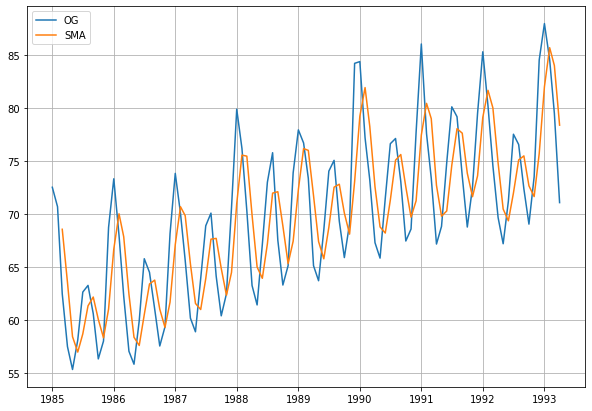

In [21]:
plt.grid(True)
plt.plot(df1["Consumption"],label="OG")
plt.plot(df1["SMA"],label="SMA")
plt.legend(loc=2)

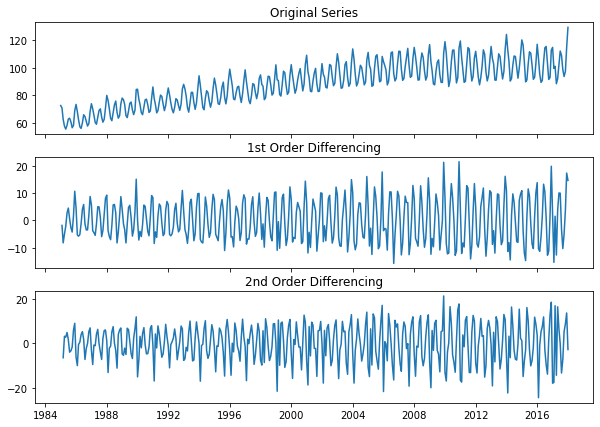

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(3, sharex=True)
axes[0].plot(df.Consumption); axes[0].set_title('Original Series')

axes[1].plot(df.Consumption.diff()); axes[1].set_title('1st Order Differencing')

axes[2].plot(df.Consumption.diff().diff()); axes[2].set_title('2nd Order Differencing')

plt.show()

In [23]:
df['Diff'] = df.Consumption.diff()
df = df.dropna()
df

,Consumption,Diff
DATE,,
1985-02-01,70.6720,-1.8332
1985-03-01,62.4502,-8.2218
1985-04-01,57.4714,-4.9788
1985-05-01,55.3151,-2.1563
1985-06-01,58.0904,2.7753
...,...,...
2017-09-01,98.6154,-10.3158
2017-10-01,93.6137,-5.0017
2017-11-01,97.3359,3.7222


In [24]:
df.head()

,Consumption,Diff
DATE,,
1985-02-01,70.6720,-1.8332
1985-03-01,62.4502,-8.2218
1985-04-01,57.4714,-4.9788
1985-05-01,55.3151,-2.1563
1985-06-01,58.0904,2.7753


### Finding Value of P

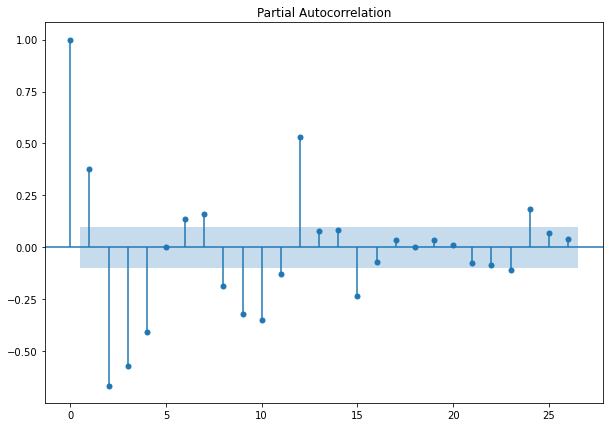

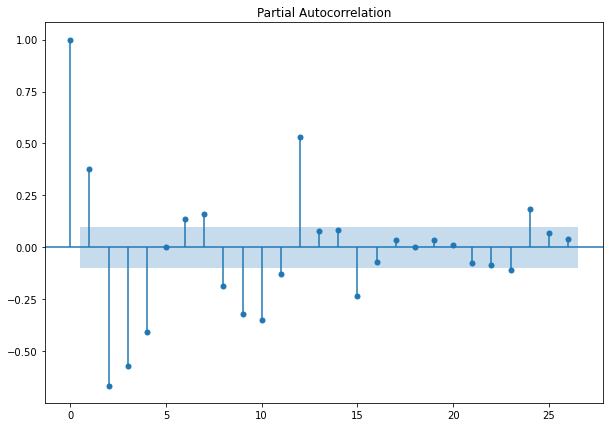

In [25]:
plot_pacf(df.Diff)

#### here lag order is 7 with difference  1

### Finding MA, ie. q

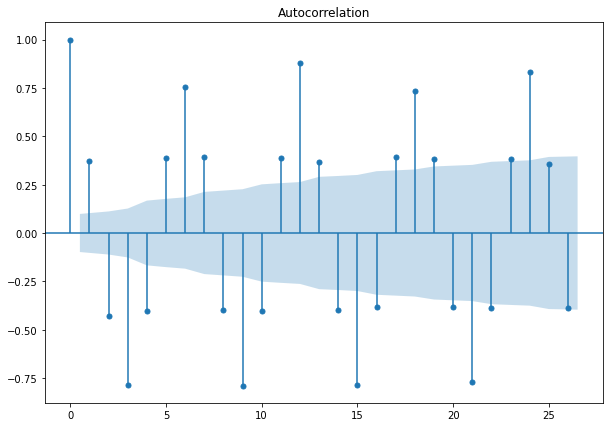

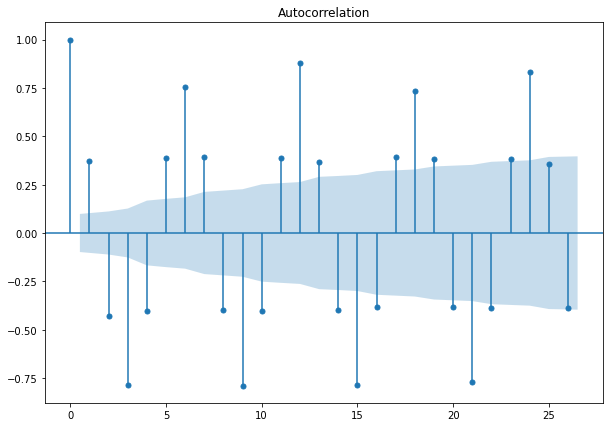

In [26]:
plot_acf(df.Diff)

 The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.
 
 Let's take q as 1

### ARIMA

In [27]:
from statsmodels.tsa.arima_model import ARIMA

In [28]:
# help(ARIMA)

model = ARIMA(df.Consumption, order=(7,1,1)) #p,d,q
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:          D.Consumption   No. Observations:                  395
Model:                 ARIMA(7, 1, 1)   Log Likelihood               -1074.722
Method:                       css-mle   S.D. of innovations              3.653
Date:                Sat, 01 May 2021   AIC                           2169.445
Time:                        06:42:08   BIC                           2209.234
Sample:                    03-01-1985   HQIC                          2185.209
                         - 01-01-2018                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1106      0.020      5.580      0.000       0.072       0.149
ar.L1.D.Consumption     0.7537      0.054     13.979      0.000       0.648       0.859
ar.L2.D.Consumpt

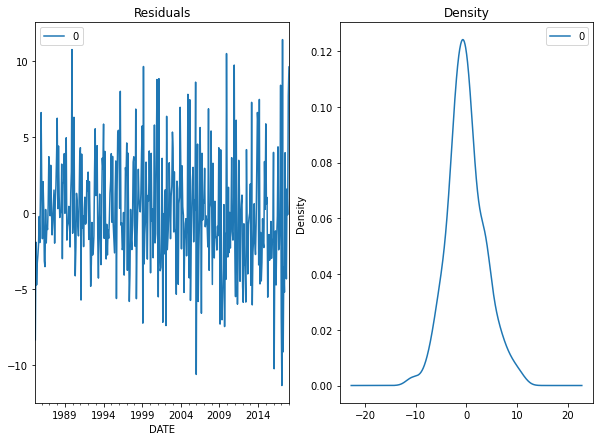

In [29]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

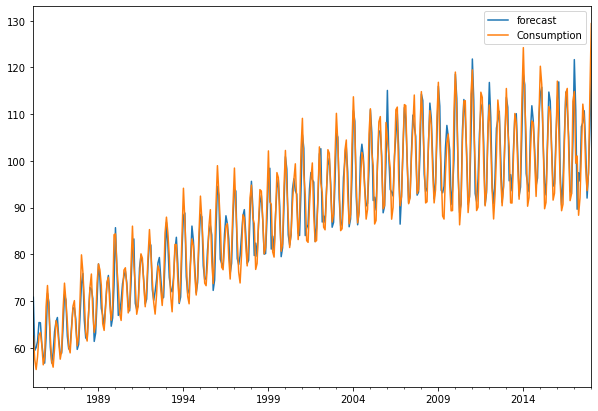

In [30]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

### Auto Arima

In [31]:
from pmdarima import auto_arima

In [32]:
auto_model = auto_arima(df.Consumption, Trace = True)

In [33]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  396
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -1040.925
Date:                Sat, 01 May 2021   AIC                           2093.850
Time:                        06:42:29   BIC                           2117.723
Sample:                             0   HQIC                          2103.308
                                - 396                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8771      0.047     18.632      0.000       0.785       0.969
ar.L2         -0.8763      0.046    -18.985      0.000      -0.967      -0.786
ar.L3         -0.1229      0.047     -2.640      0.008      -0.214      -0.032
ma.L1         -1.0333      0.021    -48.533      0.000      -1.075      -0.992
ma.L2          0.9733      0.020     49.680      0.000       0.935       1.012
sigma2        11.5440      0.744     15.516      0.000      10.086      13.002
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):                15.98
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Using Auto Arima, we get the values of p,d,q as 3,1,3

In [34]:
model = ARIMA(df.Consumption, order=(3,1,3))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:          D.Consumption   No. Observations:                  395
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1054.531
Method:                       css-mle   S.D. of innovations                nan
Date:                Sat, 01 May 2021   AIC                           2125.062
Time:                        06:42:30   BIC                           2156.893
Sample:                    03-01-1985   HQIC                          2137.674
                         - 01-01-2018                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0480        nan        nan        nan         nan         nan
ar.L1.D.Consumption     0.0553        nan        nan        nan         nan         nan
ar.L2.D.Consumpt

C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


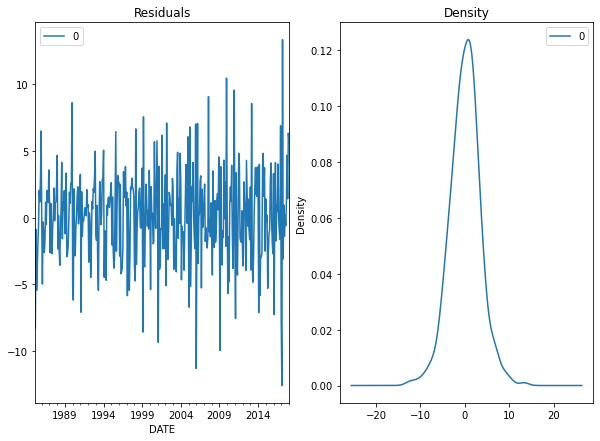

In [35]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Text(0.5, 1.0, 'sum of squares of residuals')

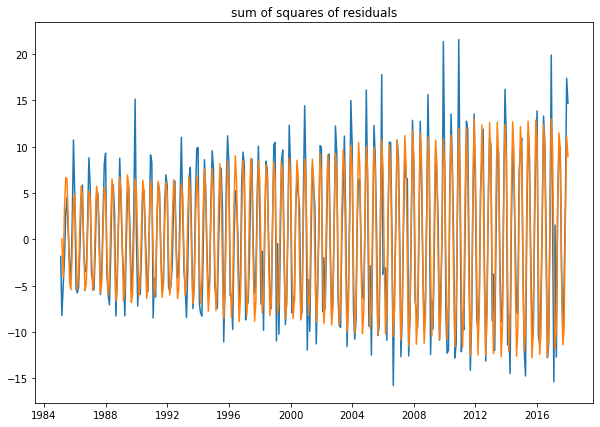

In [36]:
plt.plot(df.Diff)
plt.plot(model_fit.fittedvalues)
plt.title("sum of squares of residuals")

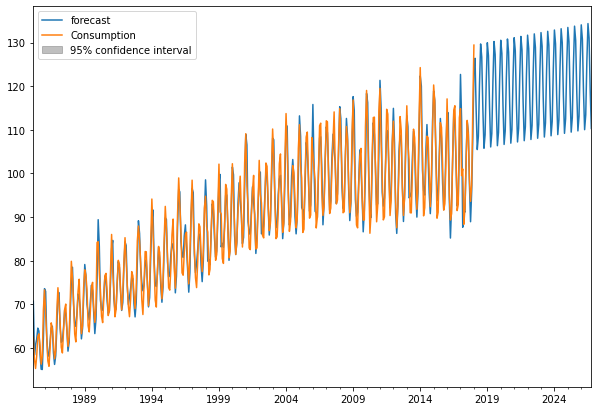

In [37]:
model_fit.plot_predict(1,500)
x=model_fit.forecast(steps=200)

### Fbprophet

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well. FBProphet uses time as a regressor and tries to fit several linear and nonlinear function of time as components.

In [38]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [39]:
data = pd.read_csv("Electric_Production.csv")

In [40]:
data.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [41]:
data["DATE"] = pd.to_datetime(data["DATE"])
data = data.rename(columns = {"IPG2211A2N":"y"})

In [42]:
data.head()

,DATE,y
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In Prophet Model, a DataFrame must have a specific format. 
The first column must have the name ***ds and contain the date-times***. The second column must have the name ***"y" and contain the observations***.

In [43]:
df = data.rename(columns ={"DATE":"ds"})

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      397 non-null    datetime64[ns]
 1   y       397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


### Create a Prophet model
#### and Future Data for Predictions

In [45]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
model = Prophet(interval_width = 0.95)
model.fit(df)

# dataframe that extends into future 30 days
future = model.make_future_dataframe(periods = 30, freq = "D")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
df.shape

(397, 2)

In [47]:
future.shape

(427, 1)

In [48]:
df.tail()

,ds,y
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212
396,2018-01-01,129.4048


In [49]:
future.tail()

,ds
422,2018-01-27
423,2018-01-28
424,2018-01-29
425,2018-01-30
426,2018-01-31


#### Predictions On The Future Data

In [50]:
# predictions
forecast = model.predict(future)

# preditions for last week
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
420,2018-01-25,126.560382,121.210614,132.105384
421,2018-01-26,124.371704,118.509623,130.313426
422,2018-01-27,121.992228,116.382047,127.579238
423,2018-01-28,119.471762,114.283644,124.904465
424,2018-01-29,116.863502,111.491206,122.499200
425,2018-01-30,114.222536,108.318842,119.931649
426,2018-01-31,111.604292,106.258837,117.140041


In [51]:
fc = forecast[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})

In [52]:
fc

,ds,yhat
0,1985-01-01,74.472769
1,1985-02-01,66.244341
2,1985-03-01,60.870585
3,1985-04-01,52.448176
4,1985-05-01,52.848970
...,...,...
422,2018-01-27,121.992228
423,2018-01-28,119.471762
424,2018-01-29,116.863502
425,2018-01-30,114.222536


#### Visualize Predictions

The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

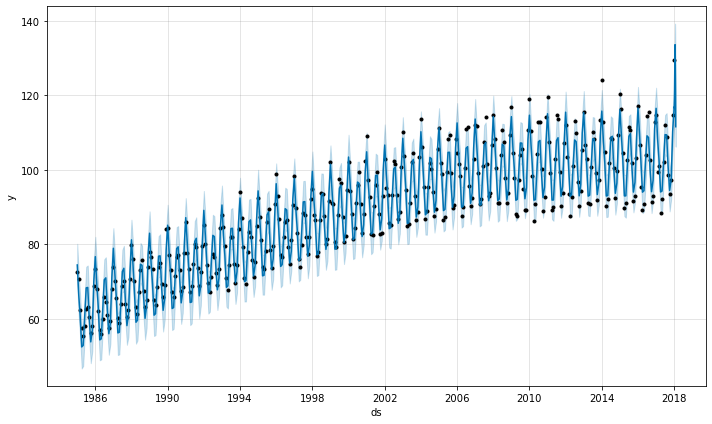

In [53]:
model.plot(forecast);

Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).

As we see Prophet catches the trends and most of the time gets future values right.

One other particularly strong feature of Prophet is its ability to return the ***components*** of our forecasts. This can help ***reveal how daily, weekly and yearly patterns of the time series***

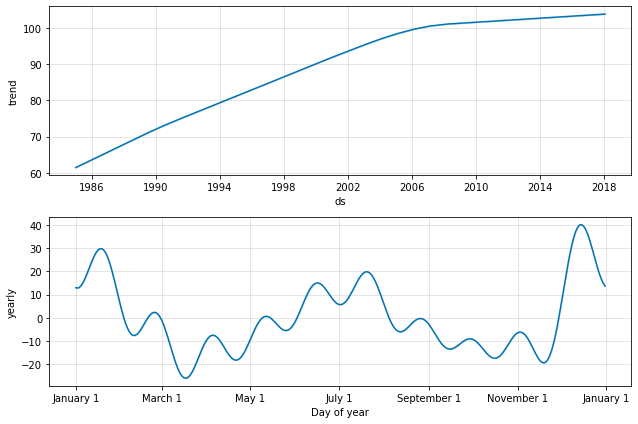

In [54]:
model.plot_components(forecast);

#### Trend Change Points

In [55]:
from fbprophet.plot import add_changepoints_to_plot

[[<matplotlib.lines.Line2D at 0x234f2adaeb0>],

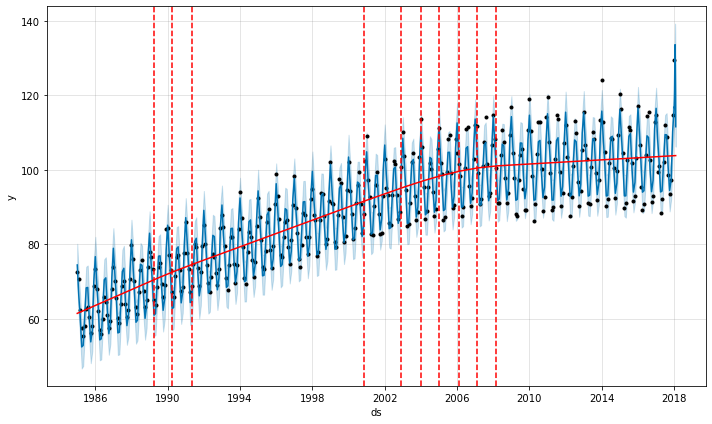

In [56]:
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)

### Conclusion of Time Series Forecasting
During this part, we discussed time series analysis with `.seasonal_decompose()`, `ACF` and `PCF` plots and fitted forecasting model using `Arima`, `Auto Arima` and a new procedure by Facebook `Prophet`.

##### __Advantages__
- A powerful tool for the time series forecasting as it accounts for time dependencies, seasonalities and holidays (Prophet: manually).

##### Disadvantage
- Even though Prophet offers an automated solution for ARIMA, this methodology is under development and not completely stable yet.
- Fitting seasonal ARIMA model needs 4 to 5 whole seasons in the dataset, which can be the biggest drawback for new companies.